#### GBM image post-processing
##### 1st May 2023
##### 2nd May ; plots as subplots (red dots), create typing class, 
##### 3rd May : updated both the typing classes, generated one set of figures for 1st image
##### 8th May : cleaned the plots
##### 19th May: Re-arraged cells, re-coded amp_code and cell_type_code, changed color scheme, added mutation_status_code group, edited size of dots
##### 21st May: y-axis inversion of plots to match image coordinates.

In [37]:
### added phenograph install
!pip install PhenoGraph 
import numpy as np
import pandas as pd
import scipy.integrate
import math
import matplotlib.pyplot as plt
import seaborn as sns
import phenograph
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
import time
import multiprocessing as mp
import os

from scipy.stats import zscore

from sklearn.manifold import TSNE
from sklearn.mixture import BayesianGaussianMixture

import phenograph as pg
import random

from matplotlib.lines import Line2D

In [38]:
colours_30 = ["gainsboro", "crimson","gold", "dodgerblue","darkorange","darkviolet","seagreen","lightpink"]
colours_31 = ["whitesmoke","silver", "orange","chocolate", "yellowgreen","forestgreen","darkkhaki","darkolivegreen",
            "pink","hotpink"]
colours_32 = ["gainsboro", "maroon"]

In [39]:
data_path = 'C:\\Users\\ugoma\\Dropbox (Scripps Research)\\Janiszewska Lab\\Ugoma_JaniszewskaLab\\Projects\\ImageAnalysis_Moffitt_Complete\\'
name = 'CM_Case05RecuA2_Broad'
count_matrix =  np.array(pd.read_csv(os.path.join(data_path+name+'.csv'), header=0,index_col=None)) #combined since it  has both pre and during data

In [40]:
### Genotyping classification: Changed to specifically categorize, single, double and triple amplifiation including equivocal. 
### Removed Equivocal class
### Ordered heirarchacally to avoid overlap with elif looping

amp_code = -1
def genotyping(r1):
    ##genotype wt and mut combined
          
    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] ==0))) :
        amp_code = 0 #no amp C228T wt
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] >=1))) :
        amp_code = 0 #no amp C228T mut     
    
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] ==0)) :
        amp_code = 1 #pdgfra amp C228T wt    
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] >=1)) :
        amp_code = 1 #pdgfra amp C228T mut
              
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 2 #egfr amp C228T wt
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 2 #egfr amp C228T mut       
   
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 3 #cdk4 amp C228T wt  
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 3 #cdk4 amp C228T mut
        
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 4 #egfr + pdgfra amp C228T wt
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 4 #egfr + pdgfra amp C228T mut
        
    
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 5 #cdk4 + pdgfra amp C228T wt
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 5 #cdk4 + pdgfra amp C228T mut

    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 6 #cdk4 + egfr amp C228T wt
    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 6 #cdk4 + egfr amp C228T mut

    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)) and (count_matrix[r1,6] ==0)) :
        amp_code = 7 #all amp C228T wt      
    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)and (count_matrix[r1,6] >=1))) :
        amp_code = 7 #all amp C228T mut
        
    return(amp_code)

geno_labels=['No amp','PDGFRA amp','EGFR amp','CDK4 amp','PDGFRA + EGFR amp','CDK4 + PDGFRA amp',
             'CDK4 + EGFR amp','CDK4 + EGFR + PDGFRA amp']

In [41]:
'''
### Function to identify amplified cells WITH mutations

amp_code2 = -4
def genotyping2(r1):
    ##genotype mut
          
    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] >=1))) :
        amp_code2 = 0 #no amp C228T mut
      
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] >=1)) :
        amp_code2 = 1 #pdgfra amp C228T mut  
                 
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 2 #egfr amp C228T mut
   
   
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 3 #cdk4 amp C228T mut  
         
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 4 #egfr + pdgfra amp C228T mut
     
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 5 #cdk4 + pdgfra amp C228T mut

    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 6 #cdk4 + egfr amp C228T mut

    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)and (count_matrix[r1,6] >=1))) :
        amp_code2 = 7 #all amp C228T mut
    
    return(amp_code2)

geno2_labels=['No amp','PDGFRA amp','EGFR amp','CDK4 amp','PDGFRA + EGFR amp','CDK4 + PDGFRA amp',
             'CDK4 + EGFR amp','CDK4 + EGFR + PDGFRA amp']'''

"\n### Function to identify amplified cells WITH mutations\n\namp_code2 = -4\ndef genotyping2(r1):\n    ##genotype mut\n          \n    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) \n        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] >=1))) :\n        amp_code2 = 0 #no amp C228T mut\n      \n    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and \n          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] >=1)) :\n        amp_code2 = 1 #pdgfra amp C228T mut  \n                 \n    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and \n          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):\n        amp_code2 = 2 #egfr amp C228T mut\n   \n   \n    elif (((count_matrix

In [42]:
'''
### function to identify amplified cells WITHOUT TERT C228T mutations


amp_code2 = -4
def genotyping2(r1):
    ##genotype wt
          
    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] ==0))) :
        amp_code2 = 0 #no amp C228T wt
          
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] ==0)) :
        amp_code2 = 1 #pdgfra amp C228T wt    
              
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 2 #egfr amp C228T wt
   
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 3 #cdk4 amp C228T wt 
            
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 4 #egfr + pdgfra amp C228T wt
        
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 5 #cdk4 + pdgfra amp C228T wt

    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 6 #cdk4 + egfr amp C228T wt
 
    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)) and (count_matrix[r1,6] ==0)) :
        amp_code2 = 7 #all amp wt
        
    return(amp_code2)

geno2_labels=['No amp','PDGFRA amp','EGFR amp','CDK4 amp','PDGFRA + EGFR amp','CDK4 + PDGFRA amp',
             'CDK4 + EGFR amp','CDK4 + EGFR + PDGFRA amp']'''


"\n### function to identify amplified cells WITHOUT TERT C228T mutations\n\n\namp_code2 = -4\ndef genotyping2(r1):\n    ##genotype wt\n          \n    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) \n        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] ==0))) :\n        amp_code2 = 0 #no amp C228T wt\n          \n    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and \n          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] ==0)) :\n        amp_code2 = 1 #pdgfra amp C228T wt    \n              \n    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and \n          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):\n        amp_code2 = 2 #egfr amp C228T wt\n   \n    elif (((co

In [43]:
### function to identify different cell types in the microenvironment
# phenotyping

cell_type_code = -2
def phenotyping(r1, amp_code):
    ##Unclassified TME
    if ((amp_code ==0) and (count_matrix[r1,6]==0) and
        (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 0 # unclassified TME cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 1 # unclassified TME cell, hypoxic
    
    ##Immune Cell Definitions      
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 2 # immune cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 2 # immune cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 3 # hypoxic immune cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 3 # hypoxic immune cell
    
    ##Endothelial Cell Definitions
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 4 # endothelial cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 5 # hypoxic endothelial cell
    
    ##Tumor Cell Definitions
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 6 # TERT mutant GBM cell, EC mimicry
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 6 # GBM cell, C228T wt, EC mimicry
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 7 # Hypoxic TERT mutant GBM cell, EC mimicry
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 7 # Hypoxic GBM cell, C228T wt, EC mimicry
    
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # GBM cell, TERT mutant
    elif (amp_code >0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # GBM cell, C228T wt
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # Hypoxic GBM cell,TERT mutant 
    elif (amp_code >0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # Hypoxic GBM cell, C228T wt    

    ## previously NA label re-catagorized based on dominating phenotype 
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 6 # NA (GBM cell, TERT mutant, EC mimicry)
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 7 # NA (Hypoxic GBM cell, TERT mutant, EC mimicry)
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # NA (GBM cell, C228T wt)
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # NA (GBM cell, TERT mutant)    
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # NA (GBM cell, C228T wt)
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # NA (Hypoxic GBM cell, C228T wt)   
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # NA (Hypoxic GBM cell, C228T wt)
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # NA (Hypoxic GBM cell,TERT mutant)

    return(cell_type_code)


pheno_labels = ['Unclassified TME','Hypoxic Unclassified TME','Immune','Hypoxic Immune','Endothelial','Hypoxic Endothelial',
                  'EC Mimicry Tumor Cell','Hypoxic EC Mimicry Tumor Cell', 'Tumor Cell',
                  'Hypoxic Tumor Cell']

In [44]:
### function to differentiate TERT mutation positive from TERT mutation negative cells
# mutation status
mutation_status_code = -3
def mutation(r1):
    if ((count_matrix[r1,6]>0)):
        mutation_status_code = 1 # TERT mutant GBM cell
      
    else:
        mutation_status_code = 0 # C228T wt, GBM
      
    return(mutation_status_code)
mut_labels = ['TERT C228T wt','TERT C228T mut']
    

In [45]:
## replace nan with 0
count_matrix[np.isnan(count_matrix)] = 0

In [46]:
im_num, count_im_num = np.unique(count_matrix[:,0],return_counts=True)

In [47]:
im_num

array([1., 2., 3., 4., 5.])

In [48]:
count_im_num

array([164, 141, 195, 152, 130], dtype=int64)

In [49]:
geno_list = []
pheno_list = []
mut_list = []
for r1 in range(count_matrix.shape[0]):
        print('row',r1)    
        ac = genotyping(r1) #genotyping function returns the amp_code value (ac = amp_code)
        print("ac=",ac)
        geno_list.append(ac)  #an array of the amp_code value for each row of the data table
            
        ct = phenotyping(r1,ac) 
        print("ct=",ct)
        pheno_list.append(ct) #an array of the cell_type_code for each row and a given amp_code
        
        mt = mutation(r1) 
        print("mt=",mt)
        mut_list.append(mt) #an array of the mutation_status_code for each row
        
        
    
        

row 0
ac= 0
ct= 0
mt= 0
row 1
ac= 0
ct= 8
mt= 1
row 2
ac= 0
ct= 0
mt= 0
row 3
ac= 0
ct= 0
mt= 0
row 4
ac= 0
ct= 0
mt= 0
row 5
ac= 0
ct= 0
mt= 0
row 6
ac= 0
ct= 0
mt= 0
row 7
ac= 0
ct= 0
mt= 0
row 8
ac= 0
ct= 0
mt= 0
row 9
ac= 0
ct= 0
mt= 0
row 10
ac= 0
ct= 0
mt= 0
row 11
ac= 0
ct= 3
mt= 0
row 12
ac= 0
ct= 4
mt= 0
row 13
ac= 0
ct= 8
mt= 1
row 14
ac= 0
ct= 8
mt= 1
row 15
ac= 0
ct= 0
mt= 0
row 16
ac= 0
ct= 4
mt= 0
row 17
ac= 0
ct= 0
mt= 0
row 18
ac= 0
ct= 8
mt= 1
row 19
ac= 0
ct= 0
mt= 0
row 20
ac= 0
ct= 0
mt= 0
row 21
ac= 0
ct= 0
mt= 0
row 22
ac= 0
ct= 0
mt= 0
row 23
ac= 0
ct= 0
mt= 0
row 24
ac= 0
ct= 0
mt= 0
row 25
ac= 0
ct= 0
mt= 0
row 26
ac= 0
ct= 8
mt= 1
row 27
ac= 0
ct= 0
mt= 0
row 28
ac= 0
ct= 0
mt= 0
row 29
ac= 0
ct= 8
mt= 1
row 30
ac= 0
ct= 0
mt= 0
row 31
ac= 0
ct= 7
mt= 1
row 32
ac= 0
ct= 4
mt= 0
row 33
ac= 0
ct= 0
mt= 0
row 34
ac= 0
ct= 7
mt= 1
row 35
ac= 0
ct= 8
mt= 1
row 36
ac= 0
ct= 0
mt= 0
row 37
ac= 0
ct= 0
mt= 0
row 38
ac= 0
ct= 0
mt= 0
row 39
ac= 0
ct= 8
mt= 1
row 40
ac=

In [50]:
count_matrix.shape

(782, 15)

In [51]:
count_matrix[0,:]

array([1.00000000e+00, 2.00000000e+00, 1.15400000e+03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.31470537e+02,
       2.36291161e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

1.0
2.0
3.0
4.0
5.0


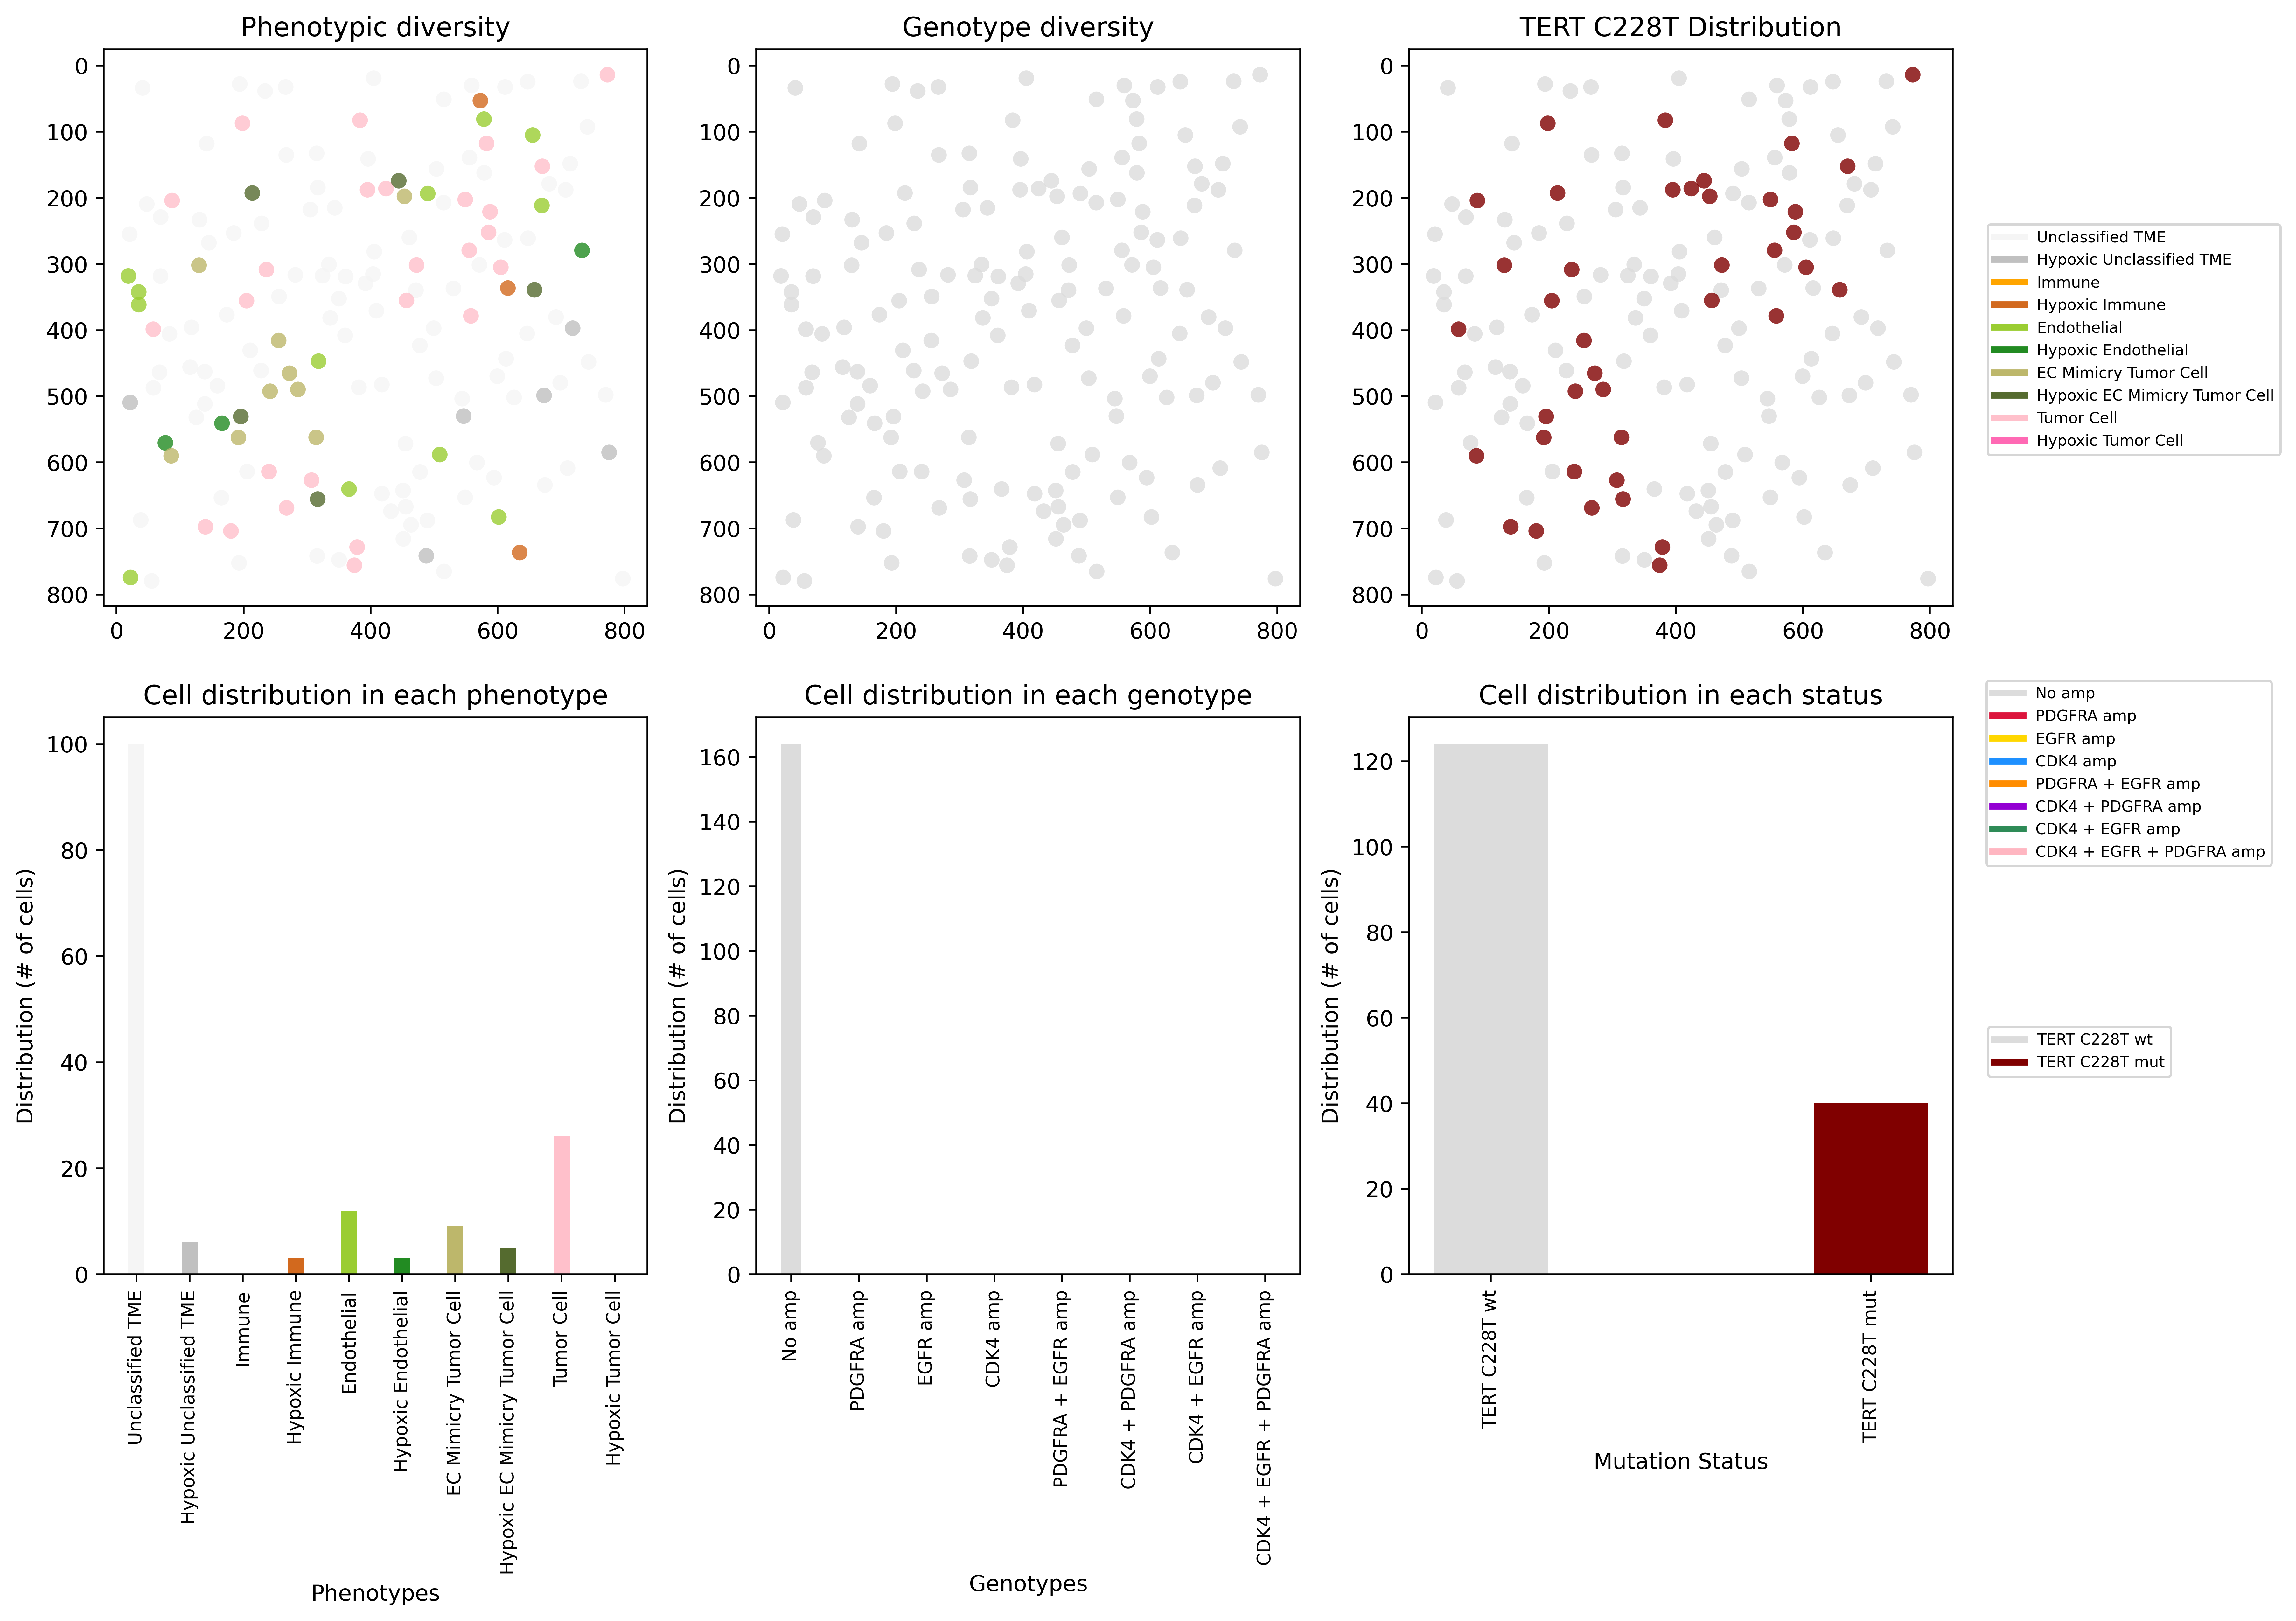

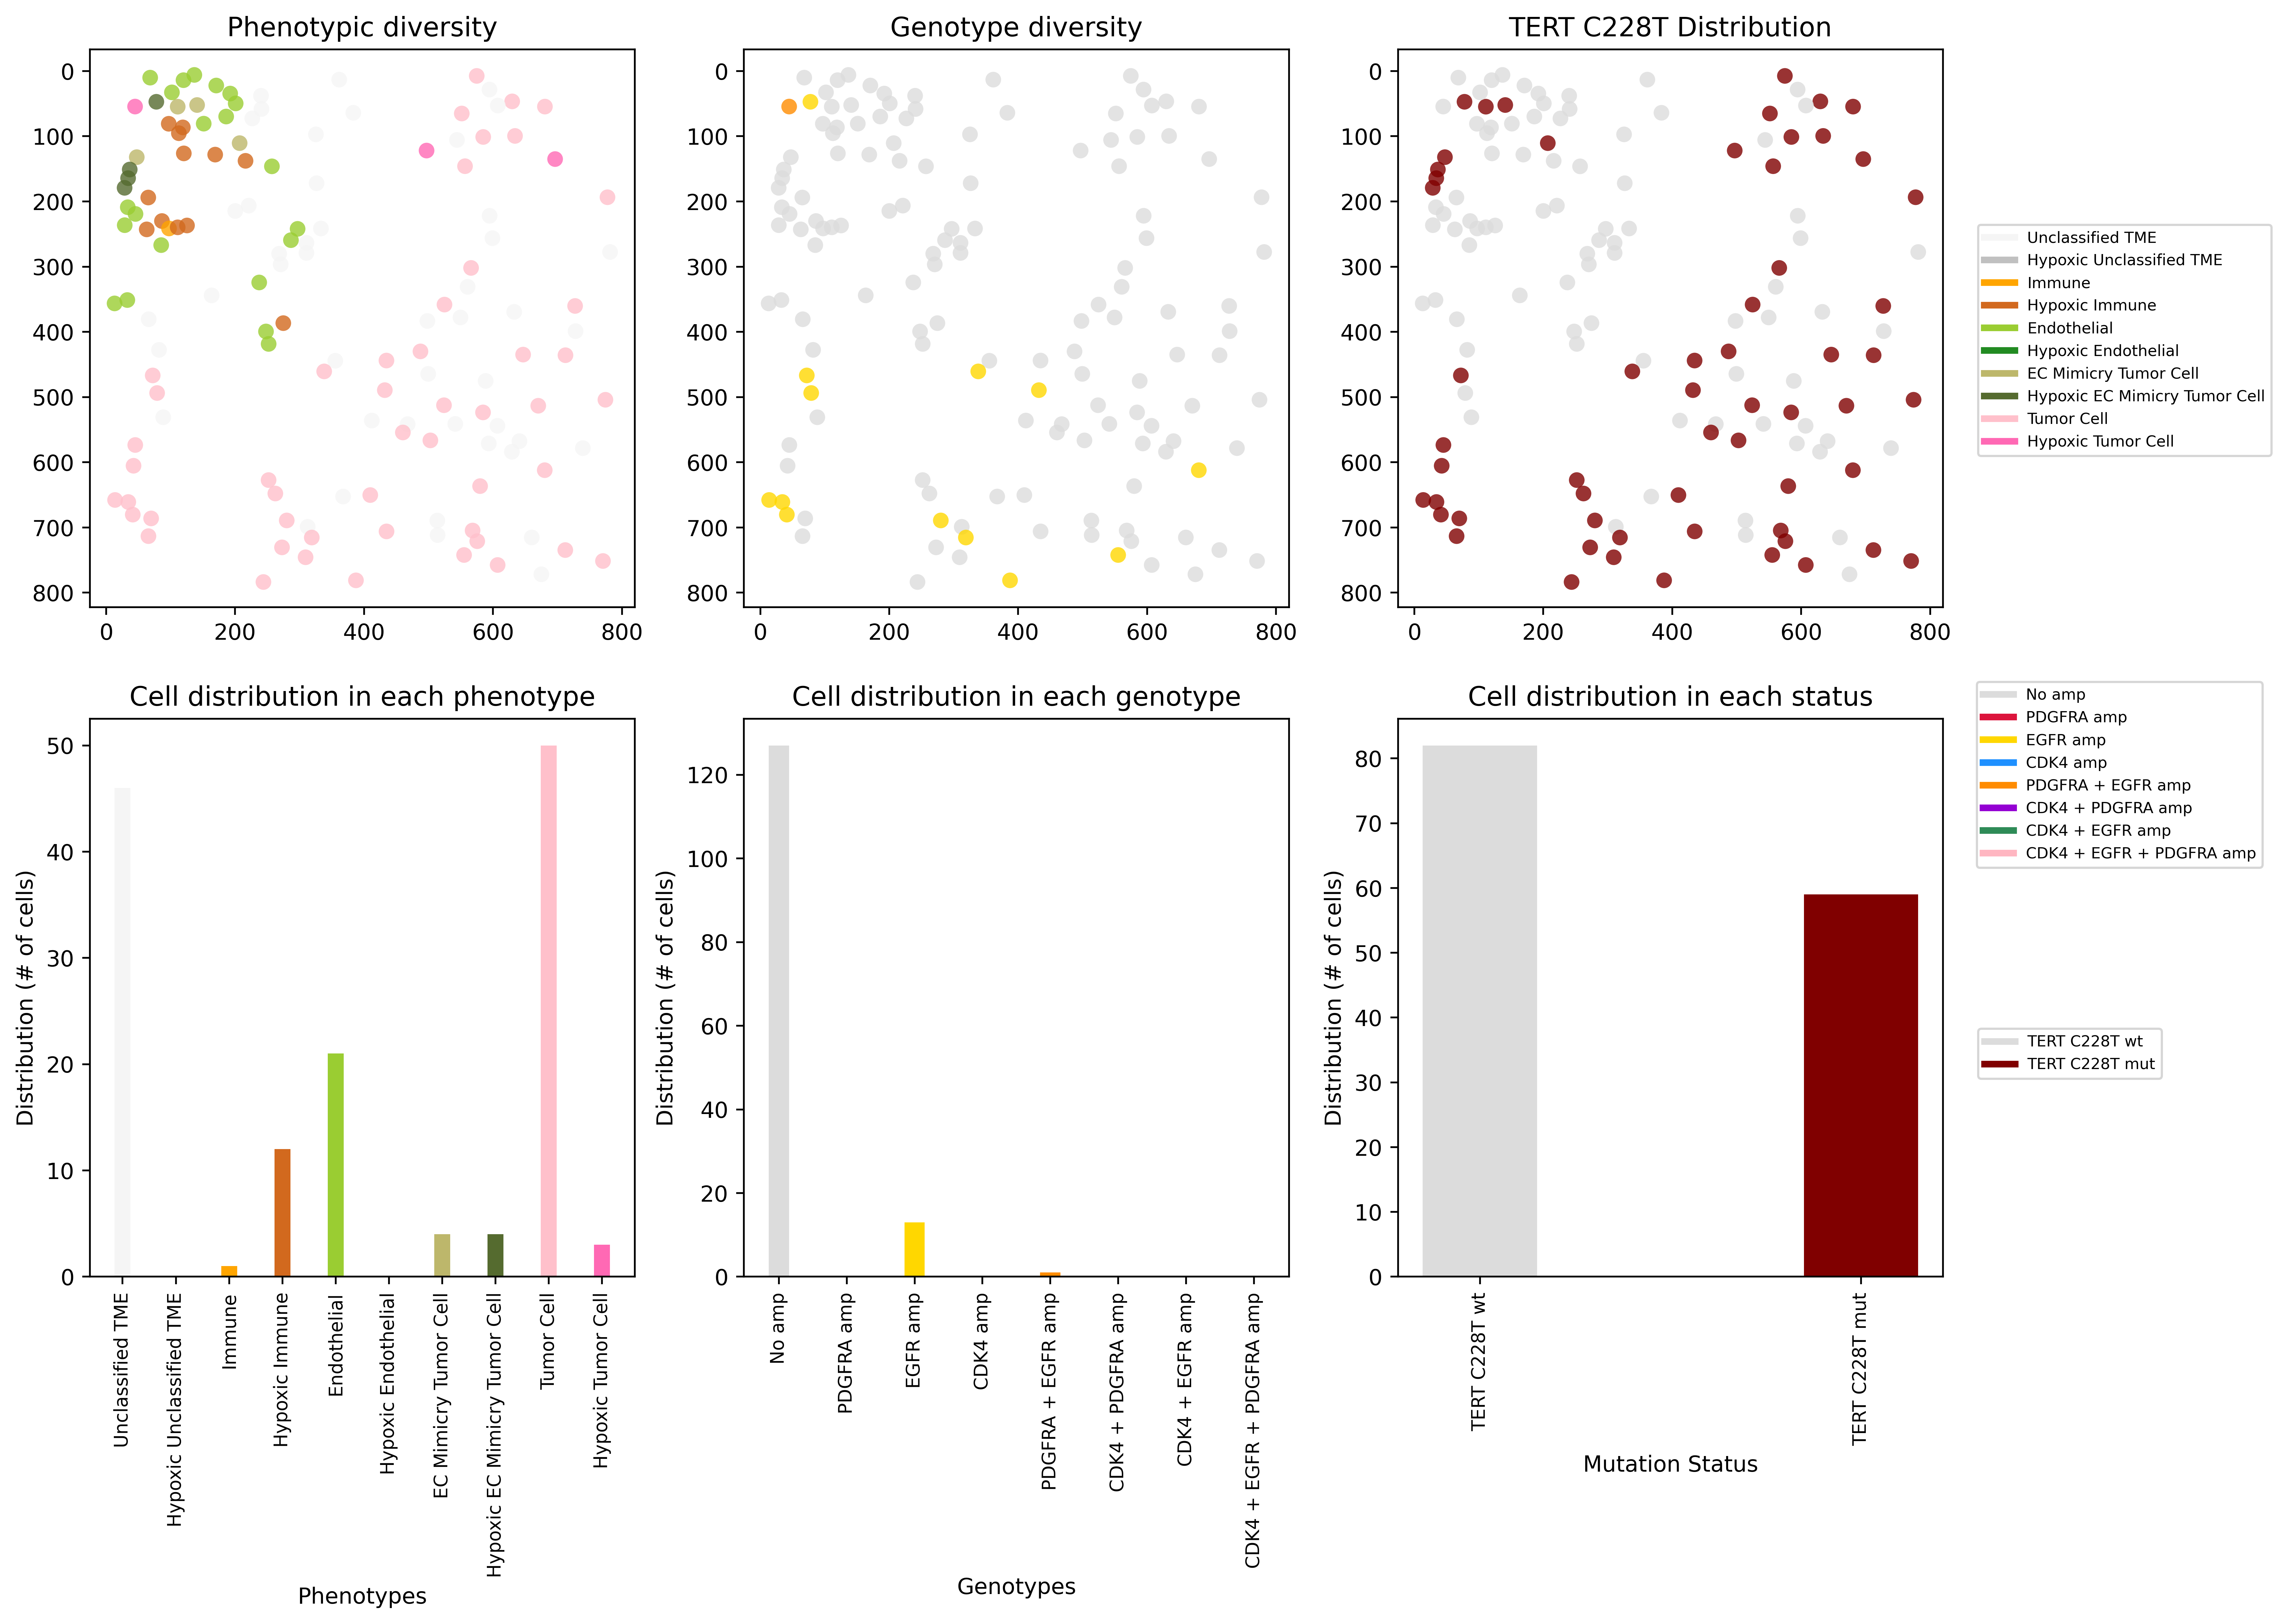

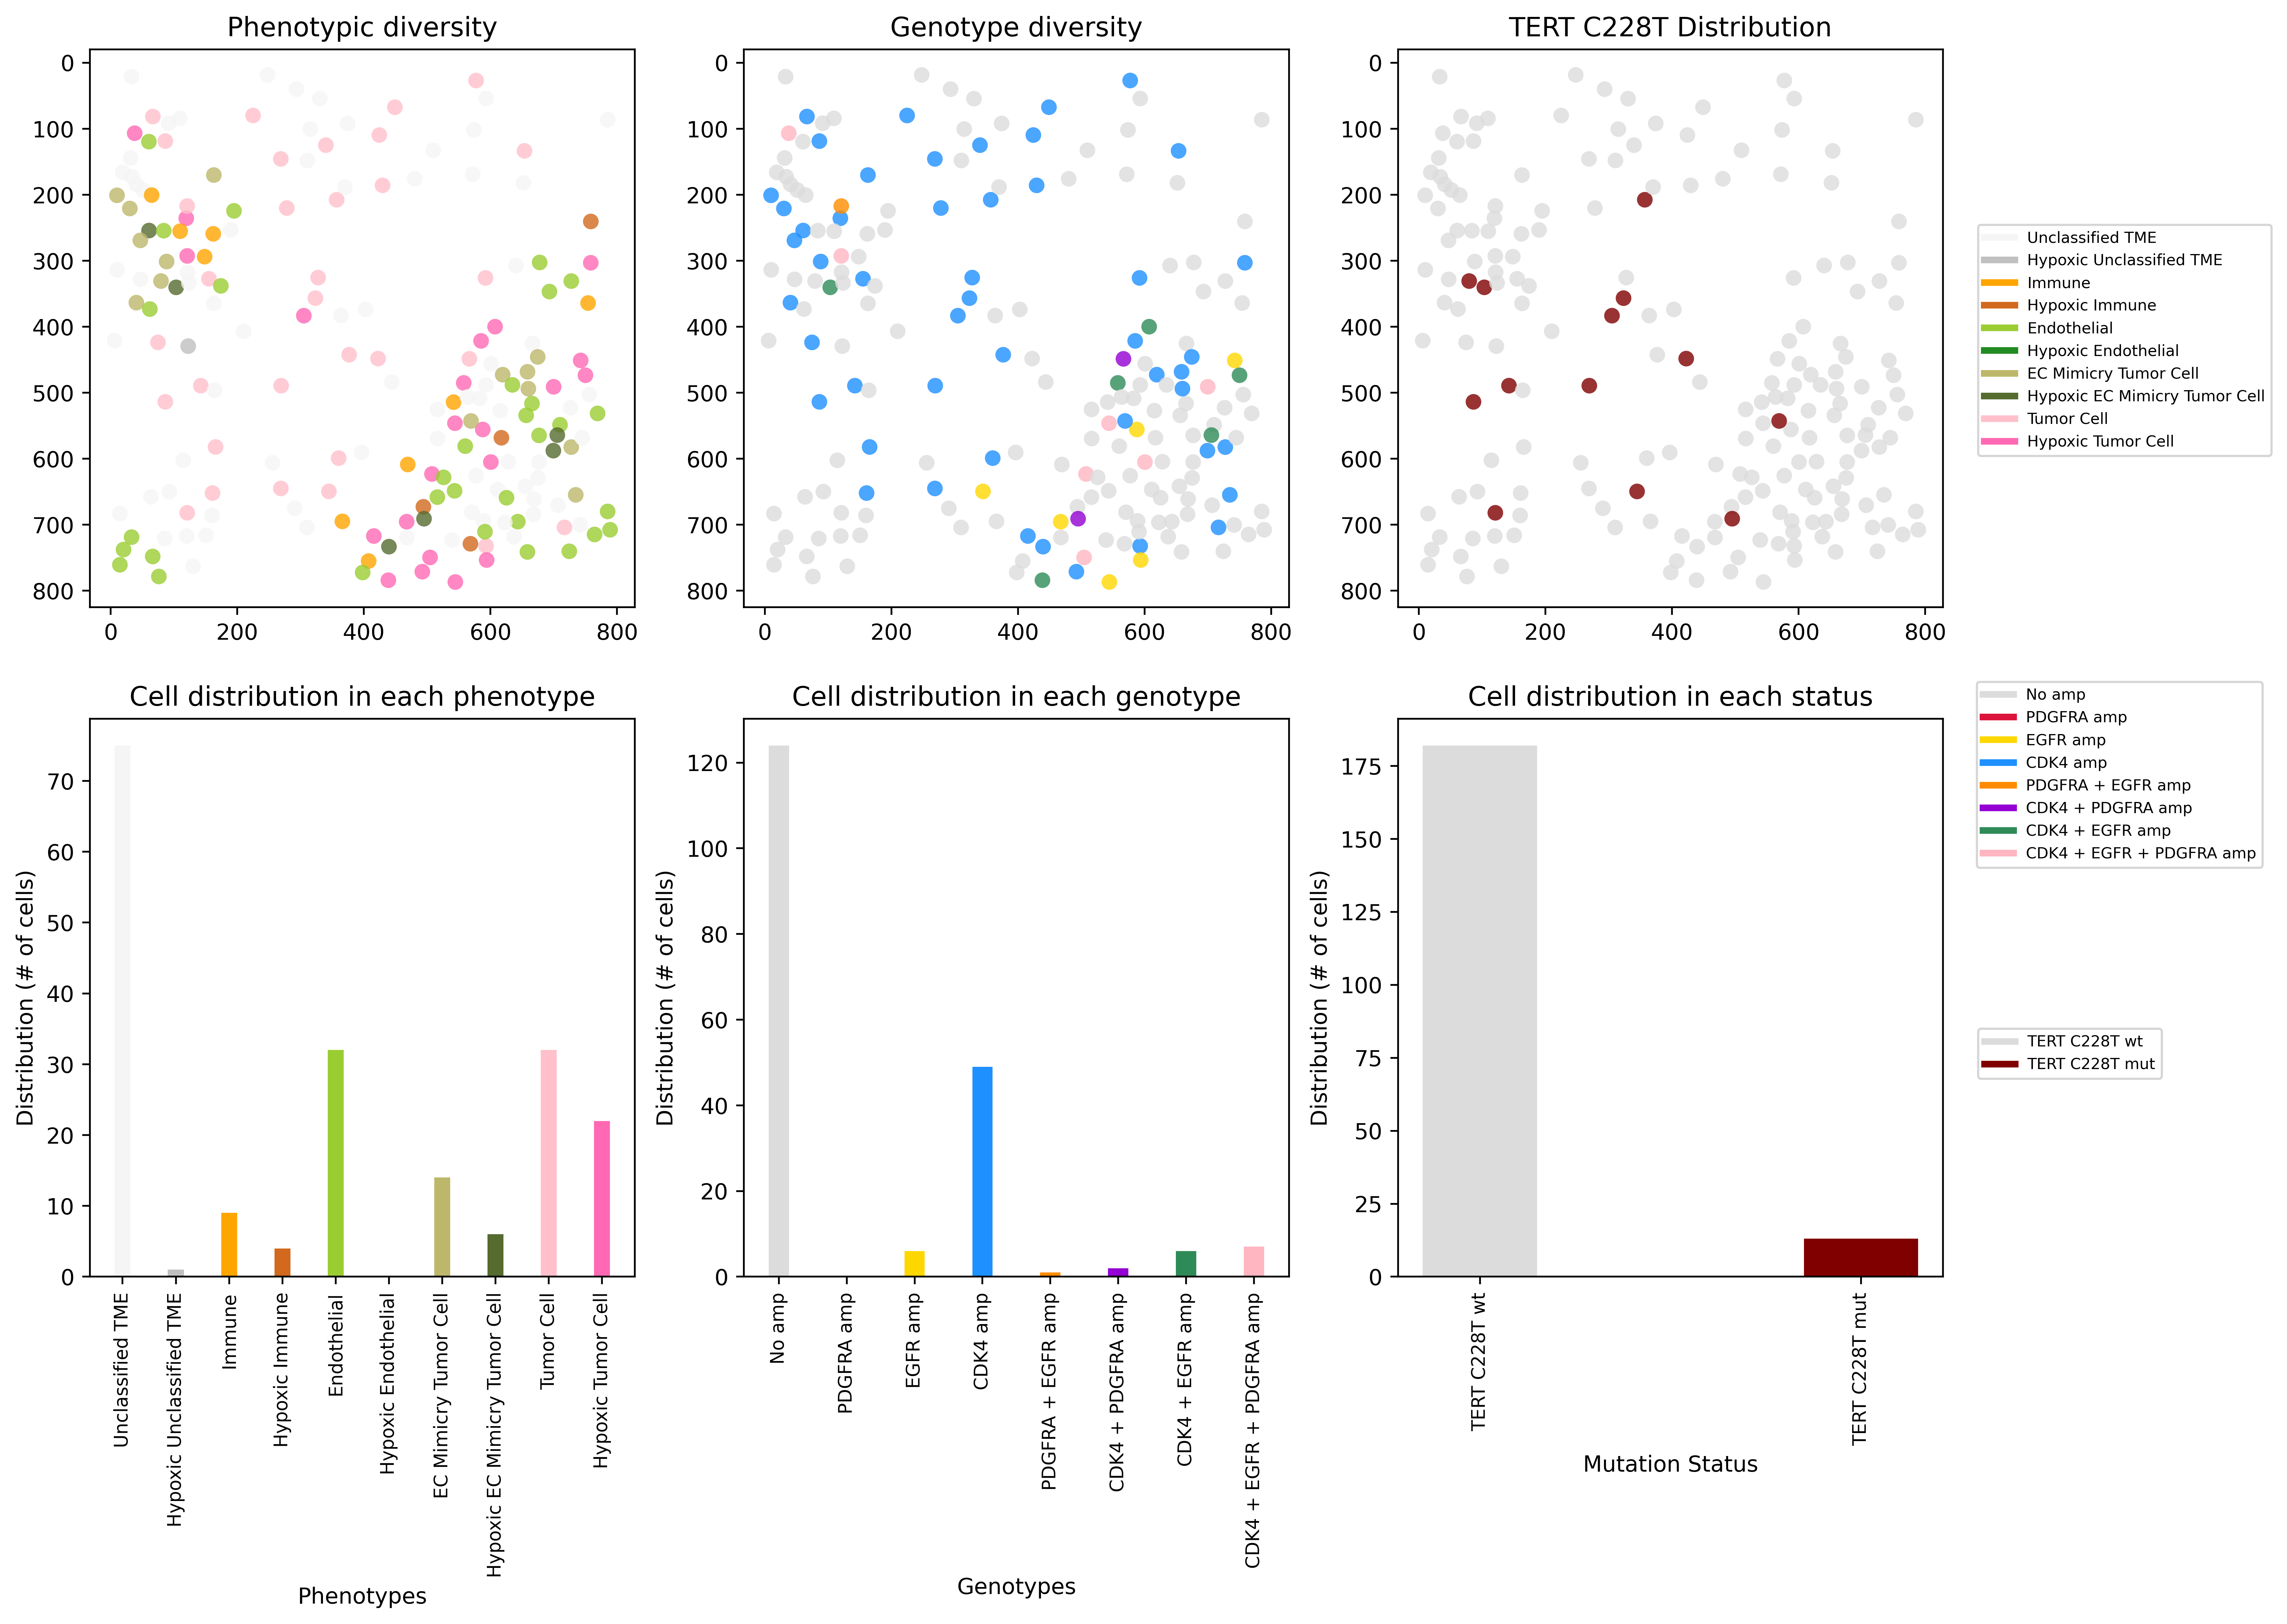

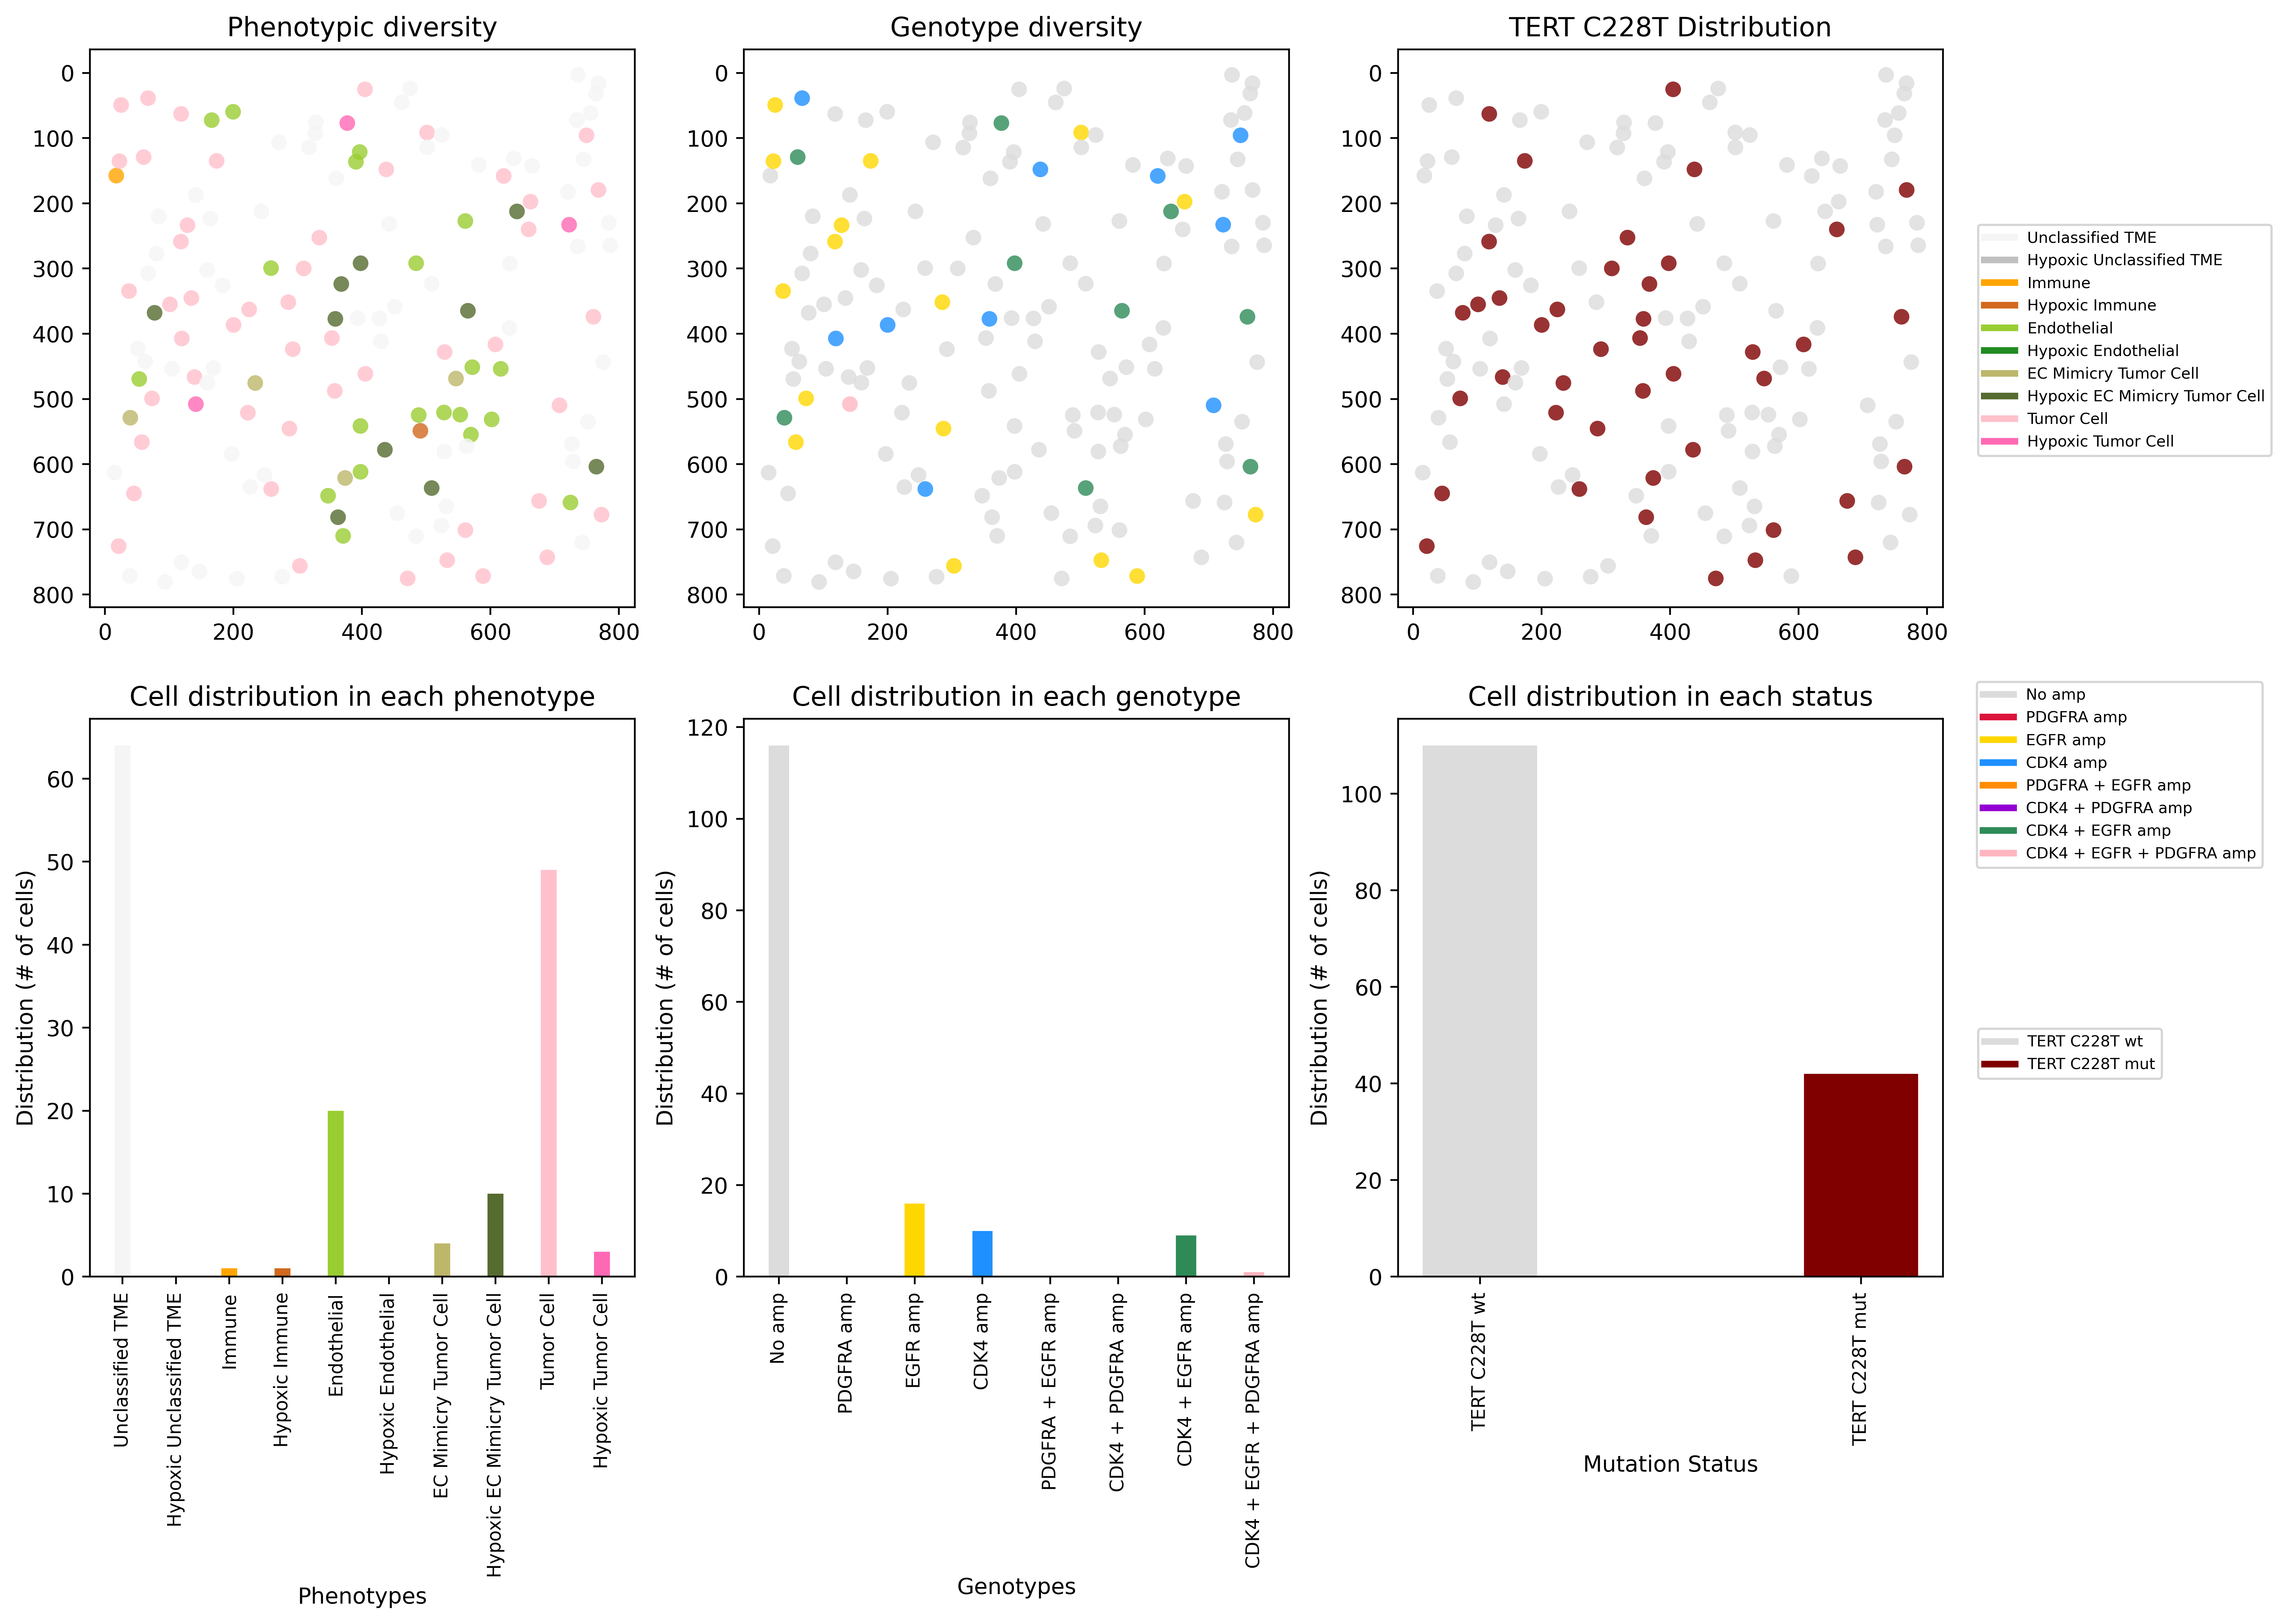

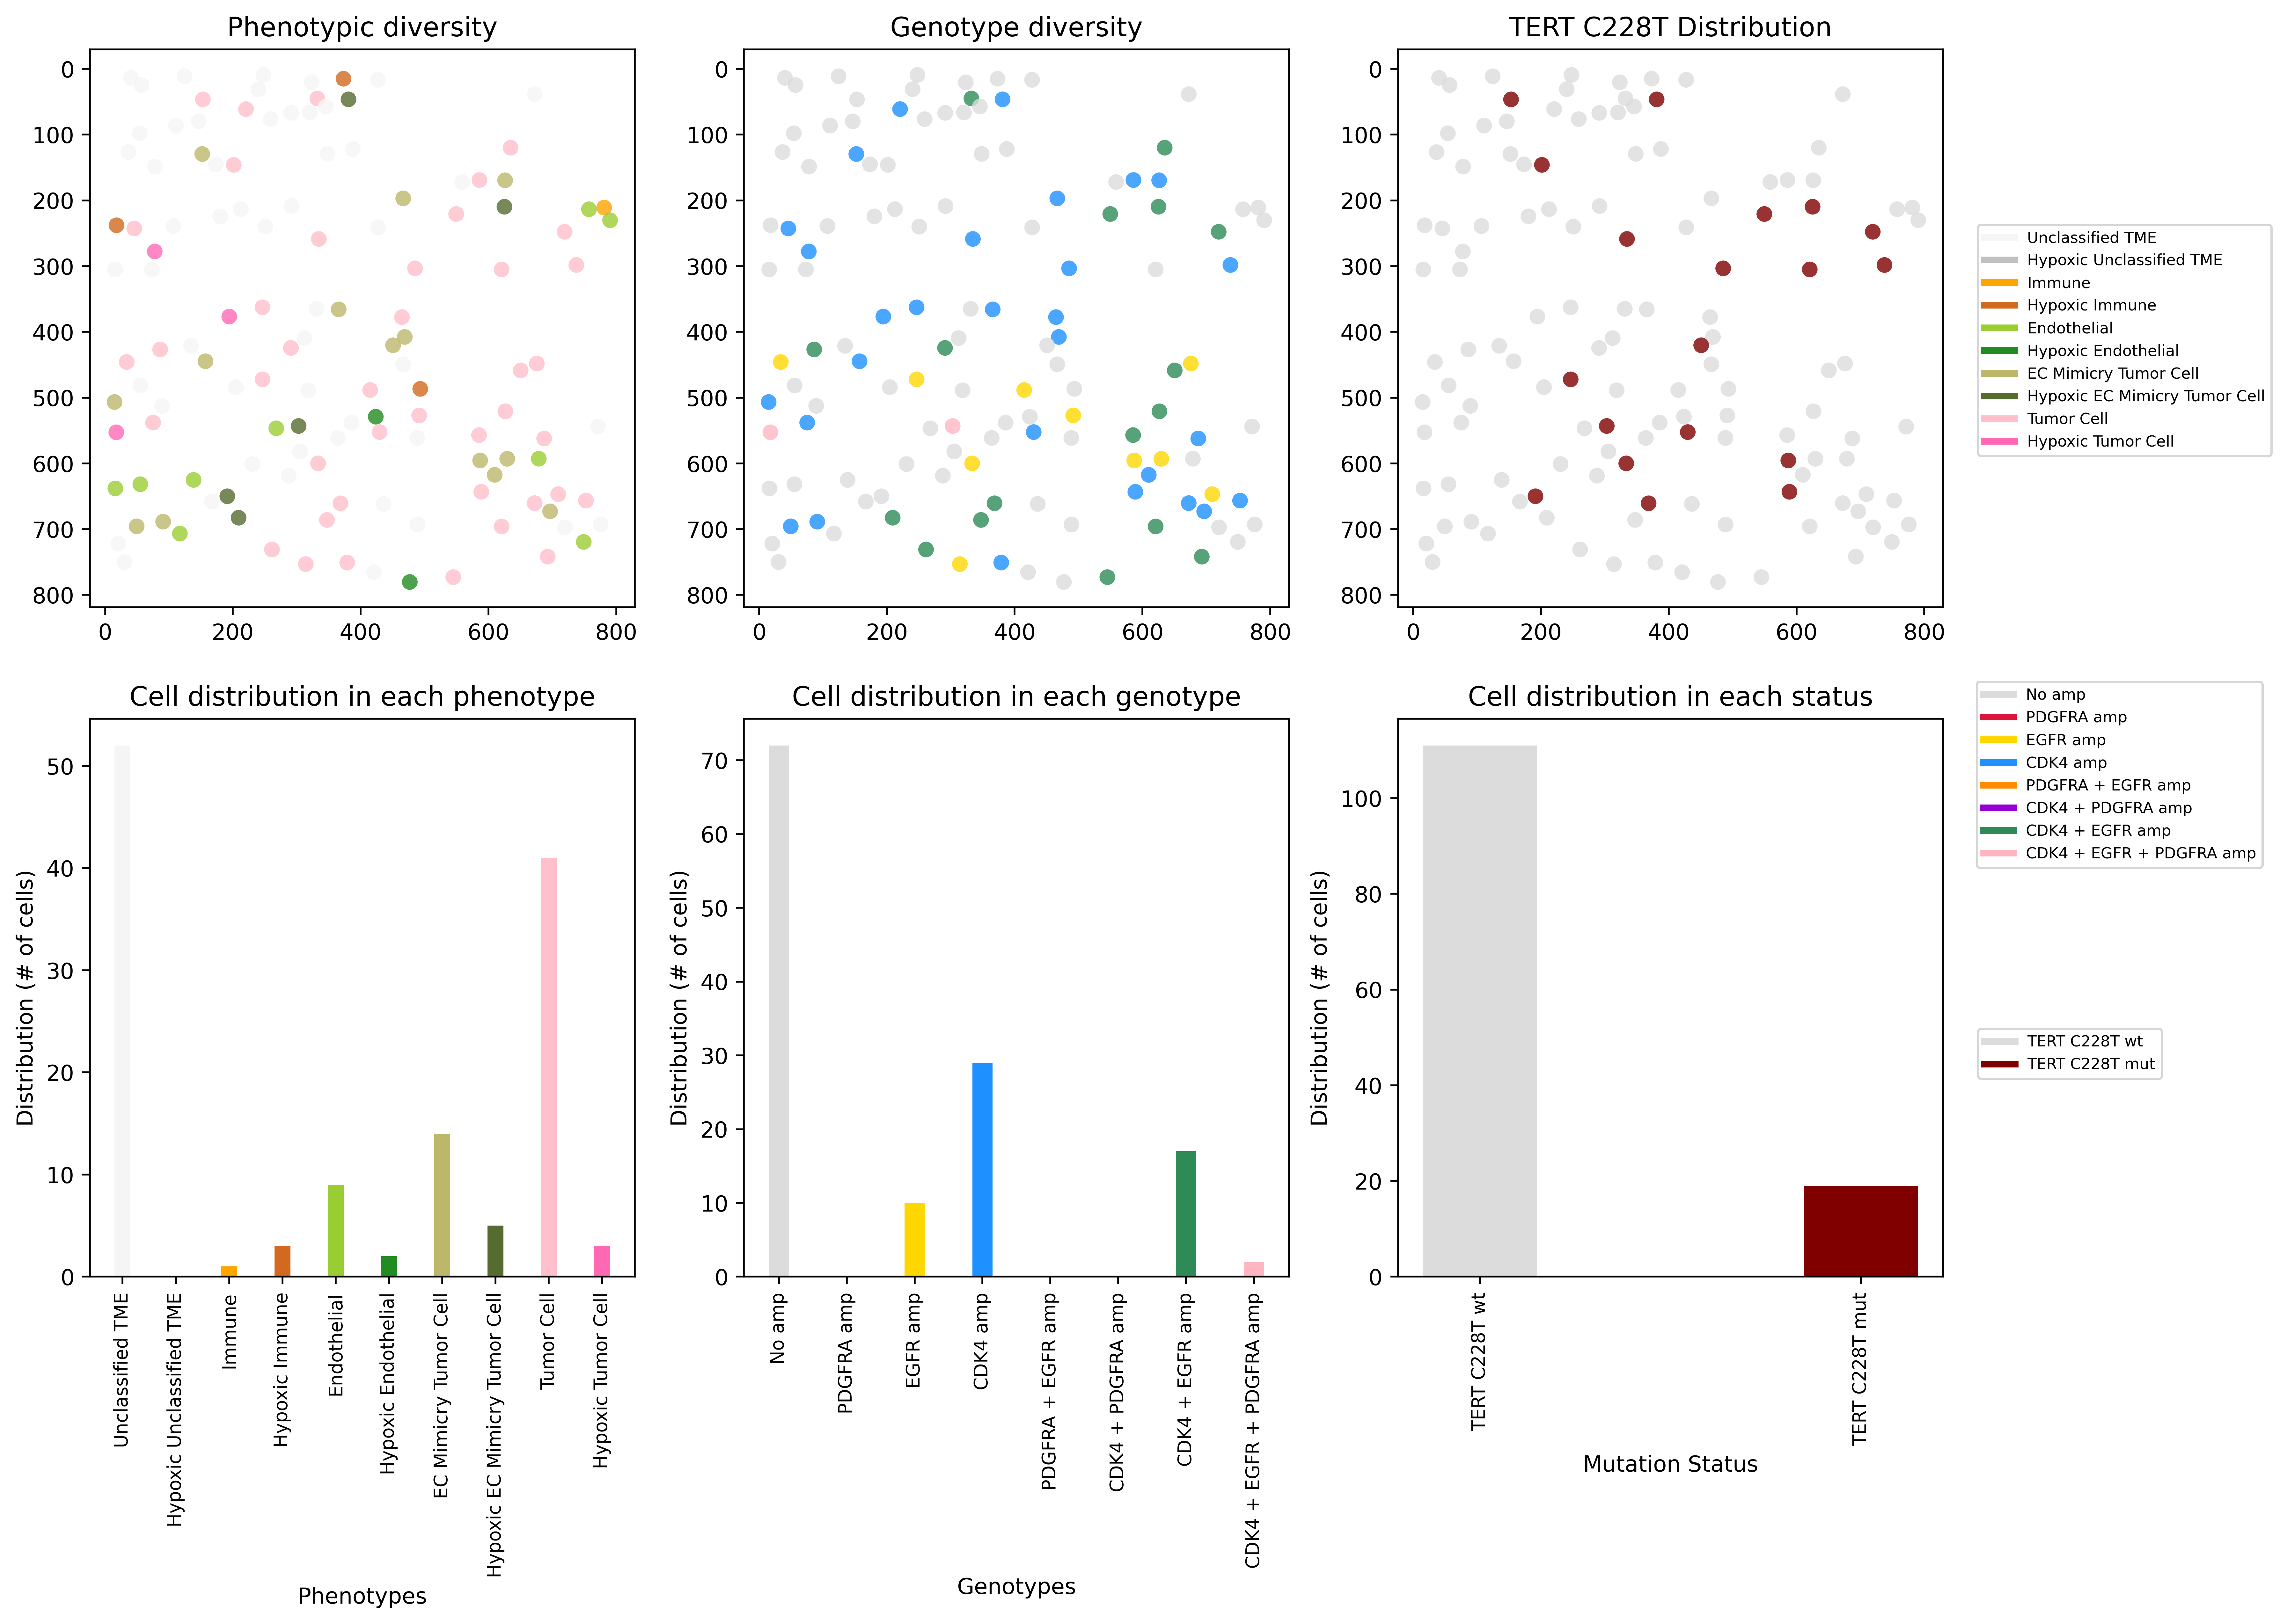

In [52]:
##Added a scatter plot and a bar plot to show spatial distriubution of TERT C228T positive nuclei
##Added the line plt.gca().invert_yaxis() to invert why axis count which mirrors orientation of fluorescent images


## merge geno and phenotypes 
    

## make it a subplot

colors = colours_30[0:9]
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = geno_labels

colors_p = colours_31[0:18]
lines_p = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_p]
labels_p = pheno_labels

colors_m = colours_32[0:9]
lines_m = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_m]
labels_m = mut_labels

#im1 = [1]

for im in im_num:
    print(im)
    ii = np.int64(im)
    
    fig = plt.figure(figsize=(15,10),dpi=500)
    plt.title(name+'_'+str(ii))
    #for cells in range(count_im_num[np.int(im)-1]):
    #print(cells)
    s1 = np.where(np.array(count_matrix[:,0])==im)
    
   
    plt.subplot(2,3,2)
    geno_colr = np.array(geno_list)[s1]
    #color_s1 = colours_30
    area = np.round(np.sqrt(count_matrix[ s1, 2]/np.pi),0)*4
    plt.scatter(count_matrix[ s1, 7], count_matrix[ s1, 8], color=np.array(colors)[geno_colr],
                s=50,linewidths=0,alpha=0.8)#, label= labels[s1])
    plt.gca().invert_yaxis()
    plt.axis('on')
    #plt.legend()
    colors = colours_30[0:9]
    lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
    labels = geno_labels
    plt.legend(lines, labels,fontsize='x-small',loc='center right', bbox_to_anchor=(2.8,-0.3))
    ###plt.legend(lines, labels,fontsize='x-small')
    plt.title('Genotype diversity')
    
    plt.subplot(2,3,5)
    #plt.hist(geno_colr)
    #plt.legend(lines, labels,fontsize='x-small')
    
    '''
    n , c= np.unique(geno_colr,return_counts=True)
    plt.bar(geno_labels, c, color =colors,width = 0.4)
    '''
    n , c= np.unique(geno_colr,return_counts=True)
    gn = np.zeros(len(geno_labels))
    for i,j in enumerate(n):
        #print(j)
        gn[j]=np.int64(c[i])
    gn = np.array(gn)
    #print(gn)  
    
    '''
    n, bins, patches = plt.hist(geno_colr, bins=len(colors))

    # adapt the color of each patch
    for c, p in zip(colors, patches):
        #p.set_facecolor(c)
        print(c)
    plt.legend(lines, labels,fontsize='x-small')
    '''
    
    X_axis = np.arange(len(geno_labels))
    X=y_marker = geno_labels
    
    plt.bar(X_axis, gn, 0.3, label = y_marker,color=colors)
    '''plt.bar(X_axis, gn2, 0.3, label = y_marker,color=colors)'''
   
    plt.xticks(X_axis, X,rotation=90,fontsize='small')
    plt.xlabel("Genotypes")
    plt.ylabel("Distribution (# of cells)")
    plt.title("Cell distribution in each genotype")
    #plt.legend(lines, labels,fontsize='x-small')
    #plt.legend(loc='upper right',fontsize='small')
    #plt.show()

    plt.subplot(2,3,1)
    pheno_colr = np.array(pheno_list)[s1]
    #color_s1 = colours_30
    #area = np.round(np.sqrt(count_matrix[ s1, 2]/np.pi),0)*4
    plt.scatter(count_matrix[ s1, 7], count_matrix[ s1, 8], color=np.array(colors_p)[pheno_colr],
                s=50,linewidths=0,alpha=0.8)# ,label= np.array(colours_30)[pheno_colr] )
    plt.gca().invert_yaxis()
    plt.axis('on')
    #plt.legend(lines_p, labels_p,fontsize='xx-small')
    plt.title('Phenotypic diversity')
    
    colors_p = colours_31[0:18]
    lines_p = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_p]
    labels_p = pheno_labels
    plt.legend(lines_p, labels_p,fontsize='x-small',loc='upper left', bbox_to_anchor=(3.45, 0.7))
    
    plt.subplot(2,3,4)
    n , c= np.unique(pheno_colr,return_counts=True)
    pn = np.zeros(len(pheno_labels))
    for i,j in enumerate(n):
        #print(j)
        pn[j]=np.int64(c[i])
    pn = np.array(pn)
    #print(pn)  
    
    X_axis = np.arange(len(pheno_labels))
    X=y_marker = pheno_labels
    plt.bar(X_axis, pn, 0.3, label = y_marker,color=colors_p)
    plt.xticks(X_axis, X,rotation=90,fontsize='small')
    plt.xlabel("Phenotypes")
    plt.ylabel("Distribution (# of cells)")
    plt.title("Cell distribution in each phenotype")
    #plt.legend(loc='upper right',fontsize='small')
    #plt.show()
    #plt.legend(lines_p, labels_p,fontsize='x-small',loc='center left', bbox_to_anchor=(1, 0.5))
 
    plt.subplot(2,3,3)
    mut_colr = np.array(mut_list)[s1]
    #color_s1 = colours_30
    #area = np.round(np.sqrt(count_matrix[ s1, 2]/np.pi),0)*4
    plt.scatter(count_matrix[ s1, 7], count_matrix[ s1, 8], color=np.array(colors_m)[mut_colr],
                s=50,linewidths=0,alpha=0.8)# ,label= np.array(colours_30)[pheno_colr] )
    plt.gca().invert_yaxis()
    plt.axis('on')
    #plt.legend(lines_p, labels_p,fontsize='xx-small')
    plt.title('TERT C228T Distribution')
    
    colors_m = colours_32[0:9]
    lines_m = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_m]
    labels_m = mut_labels
    plt.legend(lines_m, labels_m,fontsize='x-small',loc='center right', bbox_to_anchor=(1.415,-0.8))
    
    plt.subplot(2,3,6)
    n , c= np.unique(mut_colr,return_counts=True)
    mn = np.zeros(len(mut_labels))
    for i,j in enumerate(n):
        #print(j)
        mn[j]=np.int64(c[i])
    mn = np.array(mn)
    #print(pn)  
    
    X_axis = np.arange(len(mut_labels))
    X=y_marker = mut_labels
    plt.bar(X_axis, mn, 0.3, label = y_marker,color=colors_m)
    plt.xticks(X_axis, X,rotation=90,fontsize='small')
    plt.xlabel("Mutation Status")
    plt.ylabel("Distribution (# of cells)")
    plt.title("Cell distribution in each status")
    #plt.legend(loc='upper right',fontsize='small')
    #plt.show()
    #plt.legend(lines_m, labels_m,fontsize='x-small',loc='center left', bbox_to_anchor=(1, 0.5))


    plt.savefig(name+'_'+str(ii)+'_fig'+'.png',bbox_inches='tight')

In [53]:
beta = (3<6)

In [54]:
not(beta)

False

In [55]:
beta and (4<6)

True